<a href="https://colab.research.google.com/github/alexanderbandeiralira/MMM-TimeSeries/blob/main/TimeSeriesMMMExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MMM - Time Series**

O script a seguir é um exemplo de com time series aplicado ao MMM (Marketing Mix Modeling) que é uma técnica analítica que visa medir e quantificar o impacto das várias variáveis de marketing sobre as vendas ou outros indicadores-chave de desempenho de uma empresa.

As séries temporais são usadas no MMM para analisar padrões e tendências ao longo do tempo. Elas são particularmente úteis para lidar com a natureza dinâmica dos dados de vendas, capturando a dependência temporal e a sazonalidade presente nos dados. Por meio da análise de séries temporais, é possível identificar padrões sazonais, como aumentos nas vendas durante as férias ou em determinadas épocas do ano. 

Além disso, as séries temporais podem ser usadas para realizar previsões futuras de vendas, permitindo o planejamento adequado de estoque, produção e recursos.


Para uma boa série temporal, é importante considerar os seguintes requisitos:


*   Estacionariedade: A estacionariedade é uma propriedade fundamental de uma série temporal. Isso implica que a média, a variância e a estrutura de autocorrelação não mudam ao longo do tempo. Uma série temporal estacionária é mais fácil de modelar e prever. É importante garantir que a série seja estacionária ou aplicar transformações adequadas para torná-la estacionária.

*   Ausência de tendência: Uma tendência é um padrão sistemático de crescimento ou declínio ao longo do tempo. É importante remover a tendência para analisar os padrões subjacentes na série temporal. Isso pode ser feito por meio de diferenciação ou aplicação de técnicas de suavização, como médias móveis ou suavização exponencial.


*   Ausência de sazonalidade: A sazonalidade refere-se a variações regulares e previsíveis que ocorrem em intervalos fixos de tempo, como padrões sazonais diários, mensais ou anuais. É importante identificar e ajustar a sazonalidade para compreender as flutuações de curto prazo na série temporal.

*   Autocorrelação: A autocorrelação é a relação entre as observações em diferentes momentos no tempo. A análise da autocorrelação ajuda a identificar padrões repetitivos e dependências temporais na série temporal. Isso pode ajudar a determinar a ordem dos termos autorregressivos (AR) e de médias móveis (MA) a serem incluídos em um modelo de séries temporais.


*   Ausência de outliers: Outliers são pontos de dados extremos que se desviam significativamente do padrão geral da série temporal. Eles podem distorcer a análise e prejudicar as previsões. É importante identificar e tratar outliers adequadamente, seja removendo-os, transformando-os ou tratando-os de forma apropriada para o contexto da análise.

*   Estabilidade da variância: A estabilidade da variância refere-se à consistência da variância da série temporal ao longo do tempo. Variações excessivas na variância podem indicar heteroscedasticidade, o que pode afetar negativamente a qualidade dos modelos e previsões. É importante verificar e lidar com a estabilidade da variância, seja por meio de transformações adequadas ou pela utilização de modelos específicos para lidar com heteroscedasticidade.


In [13]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importar as bibliotecas necessárias**


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

## **Criar dados de exemplo**

Vamos criar alguns dados fictícios de vendas ao longo do tempo para demonstrar as etapas de análise. Suponha que tenhamos dados mensais de vendas durante 2 anos.

In [15]:
# Definir a semente para a geração de números aleatórios
np.random.seed(10)

# Criar índice de datas mensais
dates = pd.date_range(start='2019-01', end='2022-12', freq='M')

# Criar uma série temporal com tendência e sazonalidade
sales = np.sin(np.arange(len(dates)) * np.pi/6) + np.random.randn(len(dates)) * 0.2

# Criar um DataFrame com os dados de vendas
data = pd.DataFrame({'Sales': sales}, index=dates)


## **Verificar a estacionariedade**

Para verificar se a série é estacionária, podemos plotar um gráfico de linha e realizar o teste ADF.

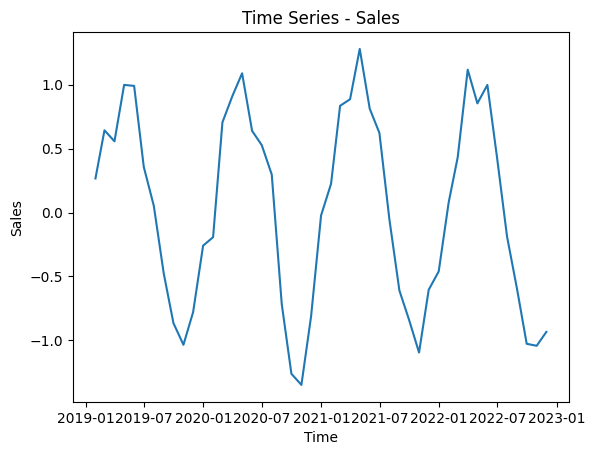

ADF Statistic: -5.749899724141365
p-value: 6.000205454278193e-07
Critical Values:
1%: -3.610399601308181
5%: -2.939108945868946
10%: -2.6080629651545038


In [16]:
# Plotar gráfico de linha
plt.plot(data.index, data['Sales'])
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Time Series - Sales')
plt.show()

# Função para realizar o teste ADF e imprimir o resultado
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

# Aplicar o teste ADF à série de vendas
perform_adf_test(data['Sales'])


Os resultados do teste ADF (Augmented Dickey-Fuller) fornecem informações sobre a estacionariedade da série temporal de vendas. Aqui está a interpretação dos resultados:

- ADF Statistic: O valor do ADF Statistic é -5.749899724141365. Esse valor representa a estatística do teste Augmented Dickey-Fuller (ADF). Quanto mais negativo esse valor, maior é a evidência de estacionariedade na série temporal. Nesse caso, o valor negativo indica que há evidência de estacionariedade na série.

- p-value: O valor do p-value é 6.000205454278193e-07. Esse valor é utilizado para testar a hipótese nula de que a série temporal é não estacionária. Se o valor do p-value for menor que um determinado nível de significância (geralmente 0.05), rejeitamos a hipótese nula e concluímos que a série é estacionária. Nesse caso, o valor muito baixo do p-value (próximo de zero) indica que podemos rejeitar a hipótese nula e afirmar que a série é estacionária.

- Critical Values: Os valores críticos fornecidos são usados como referência para comparar com o valor do ADF Statistic. Se o valor do ADF Statistic estiver abaixo dos valores críticos, temos evidências mais fortes de estacionariedade na série temporal. Nesse caso, o valor do ADF Statistic está abaixo de todos os valores críticos (1%, 5% e 10%), o que reforça a evidência de estacionariedade na série.

Portanto, com base nos valores obtidos, podemos concluir que a série temporal é estacionária. Isso implica que a média, a variância e a estrutura de autocorrelação não mudam ao longo do tempo, o que é um requisito importante para a aplicação de modelos de séries temporais e previsão.

Essa análise é importante porque a estacionariedade da série temporal é um requisito para a construção de modelos de séries temporais adequados.

## **Tratar tendência e sazonalidade**

Se a série apresentar tendência ou sazonalidade, podemos aplicar técnicas de diferenciação ou decomposição sazonal

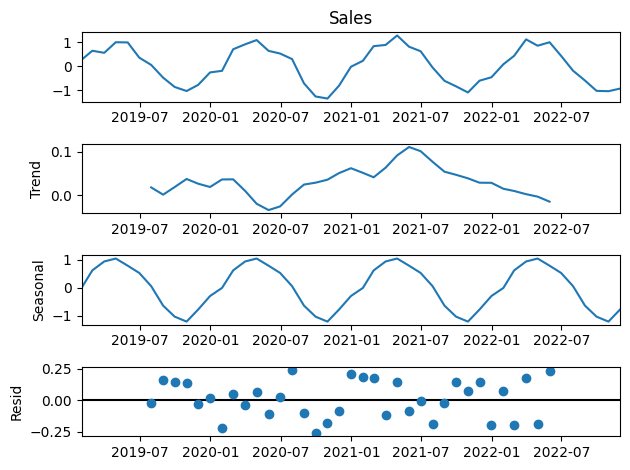

In [17]:
# Aplicar decomposição sazonal
result = seasonal_decompose(data['Sales'], model='additive')

# Plotar os componentes da decomposição sazonal
result.plot()
plt.show()

É possível notar tanto a presença de sazonalidade e já sabemos que a série é estácionária.

## **Análise da autocorrelação**

Podemos plotar gráficos de autocorrelação (ACF) e autocorrelação parcial (PACF) para analisar a autocorrelação na série temporal.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


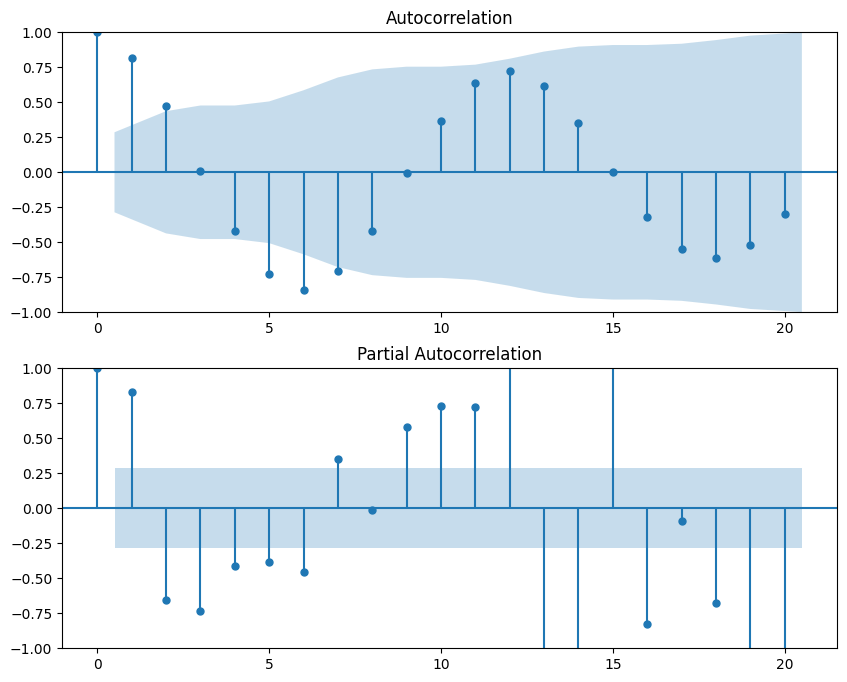

In [6]:
# Plotar gráficos de autocorrelação (ACF) e autocorrelação parcial (PACF)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data['Sales'], ax=ax1, lags=20)
plot_pacf(data['Sales'], ax=ax2, lags=20)
plt.show()


## **Previsões de vendas**

Dividir os dados em treinamento e teste

In [7]:
train_data = data.loc[:'2021-12']
test_data = data.loc['2022-01':]

In [8]:
# Criar o modelo SARIMA
model = SARIMAX(train_data['Sales'], order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))

# Ajustar o modelo aos dados de treinamento
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


order=(1, 0, 1): Exemplo para modelo SARIMA não sazonal com uma ordem AR (autoregressive) de 1, uma ordem de diferenciação (d) de 0 e uma ordem MA (moving average) de 1. Esses valores são apenas um exemplo inicial e podem ser ajustados com base na análise da autocorrelação e autocorrelação parcial da série.

seasonal_order=(1, 1, 1, 12): Exemplo para modelo SARIMA com sazonalidade. Defino uma ordem AR sazonal de 1, uma ordem de diferenciação sazonal de 1, uma ordem MA sazonal de 1 e um período sazonal de 12. O período sazonal de 12 é um exemplo comum para dados mensais com sazonalidade anual. Esses valores também podem ser ajustados com base na análise dos padrões sazonais e das autocorrelações sazonais.

In [9]:
# Ajustar o modelo aos dados de treinamento
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
# Fazer previsões para o período de teste
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

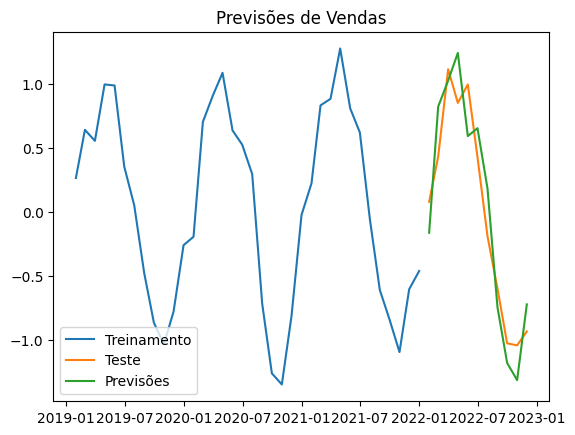

In [11]:
# Plotar os dados de treinamento, dados de teste e previsões
plt.plot(train_data.index, train_data['Sales'], label='Treinamento')
plt.plot(test_data.index, test_data['Sales'], label='Teste')
plt.plot(predictions.index, predictions, label='Previsões')
plt.title('Previsões de Vendas')
plt.legend()
plt.show()

Este exemplo utiliza um modelo SARIMA simples com ordem (1, 0, 1) e ordem sazonal (1, 1, 1, 12) para fazer previsões de vendas. Note que os parâmetros do modelo podem ser ajustados de acordo com as características dos seus dados e necessidades específicas.


**Obs: O modelo SARIMA (Seasonal Autoregressive Integrated Moving Average) foi utilizado neste exemplo por causa das características da série temporal fornecida, que inclui uma componente sazonal.**

**O modelo SARIMA é uma extensão do modelo ARIMA (Autoregressive Integrated Moving Average) que considera a sazonalidade na série temporal. Ele é adequado para séries temporais que exibem padrões sazonais, ou seja, variações regulares e previsíveis que se repetem em intervalos fixos de tempo.**

**No exemplo, após verificar a presença de sazonalidade na série temporal de vendas, aplicamos a decomposição sazonal para analisar seus componentes (tendência, sazonalidade e resíduos). Com base nessa análise, decidimos usar o modelo SARIMA para fazer as previsões.**

**O modelo SARIMA leva em consideração tanto os efeitos sazonais quanto os efeitos não sazonais na série temporal. Ele inclui parâmetros para a parte autoregressiva (AR), parte de média móvel (MA), diferenciação (I) e também a parte sazonal.**

**Ao ajustar o modelo SARIMA aos dados de treinamento, ele estima os coeficientes e outros parâmetros com base nas características da série temporal. Em seguida, podemos usar o modelo ajustado para fazer previsões para o período de teste.** 

**A escolha do modelo SARIMA pode variar dependendo das características específicas dos dados, como o padrão de sazonalidade, a ordem de autocorrelação e outros fatores. É importante ajustar o modelo adequadamente e avaliar sua qualidade usando métricas de desempenho, como erro médio absoluto (MAE) ou erro quadrático médio (RMSE), para verificar se ele é adequado para as suas necessidades.**


In [12]:

mae = mean_absolute_error(test_data['Sales'], predictions)
rmse = mean_squared_error(test_data['Sales'], predictions, squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.26375593912549244
RMSE: 0.2845631585179951


Essas métricas de desempenho são usadas para avaliar a qualidade das previsões em relação aos valores reais. Quanto menores forem os valores do MAE e RMSE, melhor será o desempenho do modelo de previsão.

MAE: O MAE é a média das diferenças absolutas entre as previsões e os valores reais. Nesse caso, o valor do MAE é 0.263, o que indica que, em média, as previsões do modelo têm uma diferença absoluta de 0.263 em relação aos valores reais. Quanto mais próximo de zero, melhor será o desempenho do modelo.

RMSE: O RMSE é a raiz quadrada da média dos erros quadrados entre as previsões e os valores reais. Nesse caso, o valor do RMSE é 0.284, o que indica que, em média, as previsões do modelo têm um erro de 0.284 em relação aos valores reais. Quanto mais próximo de zero, melhor será o desempenho do modelo.

Portanto, com base nos valores obtidos, podemos dizer que o modelo SARIMA apresenta um bom desempenho na previsão de vendas, pois os valores do MAE e RMSE são baixos. No entanto, é importante considerar o contexto do problema e comparar esses valores com outros modelos ou benchmarks relevantes para uma avaliação completa do desempenho.
